In [1]:
import pandas as pd
import os
import sys

# Get the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the system path for relative imports
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
# Define the path to the stock data directory relative to the project root
data_dir = os.path.join(project_root, "Data", "yfinance_data")

# Function to load and prepare a single stock file
def load_stock_data(file_path):
    """
    Load a single stock CSV file, parse dates, and set the index.
    Args:
        file_path (str): Path to the stock data file.
    Returns:
        pd.DataFrame: Cleaned stock data.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Ensure the required columns are present
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Missing required columns in {file_path}")
    
    # Parse dates and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Keep only the relevant columns
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    
    # Handle missing values (e.g., drop rows with NaN)
    df.dropna(inplace=True)
    
    return df

# Load all stock data files into a dictionary
stock_data = {}
for file_name in os.listdir(data_dir):
    if file_name.endswith(".csv"):  # Only process CSV files
        stock_name = file_name.split('_')[0]  # Use the stock ticker as the key
        file_path = os.path.join(data_dir, file_name)
        stock_data[stock_name] = load_stock_data(file_path)

# Example: Display data for all stocks (uncomment this loop to display data for all stocks)
for ticker, df in stock_data.items():
    print(f"Data for {ticker}:\n", df.head())

Data for AAPL:
                 Open      High       Low     Close     Volume
Date                                                         
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600
Data for AMZN:
                 Open      High       Low     Close      Volume
Date                                                          
1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000
Data for TSLA:
                 Open      High       Low     Close     Volume
Date           

In [5]:
import talib

# Function to apply technical indicators using TA-Lib
def apply_technical_indicators(df):
    """
    Apply basic technical indicators to the stock data.
    Args:
        df (pd.DataFrame): Stock data with 'Open', 'High', 'Low', 'Close', and 'Volume'.
    Returns:
        pd.DataFrame: Stock data with technical indicators.
    """
    # Calculate Simple Moving Average (SMA)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)  # 50-period SMA
    df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)  # 200-period SMA

    # Calculate Exponential Moving Average (EMA)
    df['EMA_12'] = talib.EMA(df['Close'], timeperiod=12)  # 12-period EMA
    df['EMA_26'] = talib.EMA(df['Close'], timeperiod=26)  # 26-period EMA

    # Calculate RSI (Relative Strength Index)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)  # 14-period RSI

    # Calculate MACD (Moving Average Convergence Divergence)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    return df

# Apply technical indicators to all stock data
for ticker, df in stock_data.items():
    stock_data[ticker] = apply_technical_indicators(df)

# Example: Display data for AAPL with indicators
print(f"Data for AAPL with Indicators:\n", stock_data['AAPL'].head())


Data for AAPL with Indicators:
                 Open      High       Low     Close     Volume  SMA_50  \
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600     NaN   
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800     NaN   
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000     NaN   
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600     NaN   
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600     NaN   

            SMA_200  EMA_12  EMA_26  RSI  MACD  MACD_signal  MACD_hist  
Date                                                                    
1980-12-12      NaN     NaN     NaN  NaN   NaN          NaN        NaN  
1980-12-15      NaN     NaN     NaN  NaN   NaN          NaN        NaN  
1980-12-16      NaN     NaN     NaN  NaN   NaN          NaN        NaN  
1980-12-17      NaN     NaN     NaN  NaN   NaN          NaN        NaN  
1980-12-18      Na

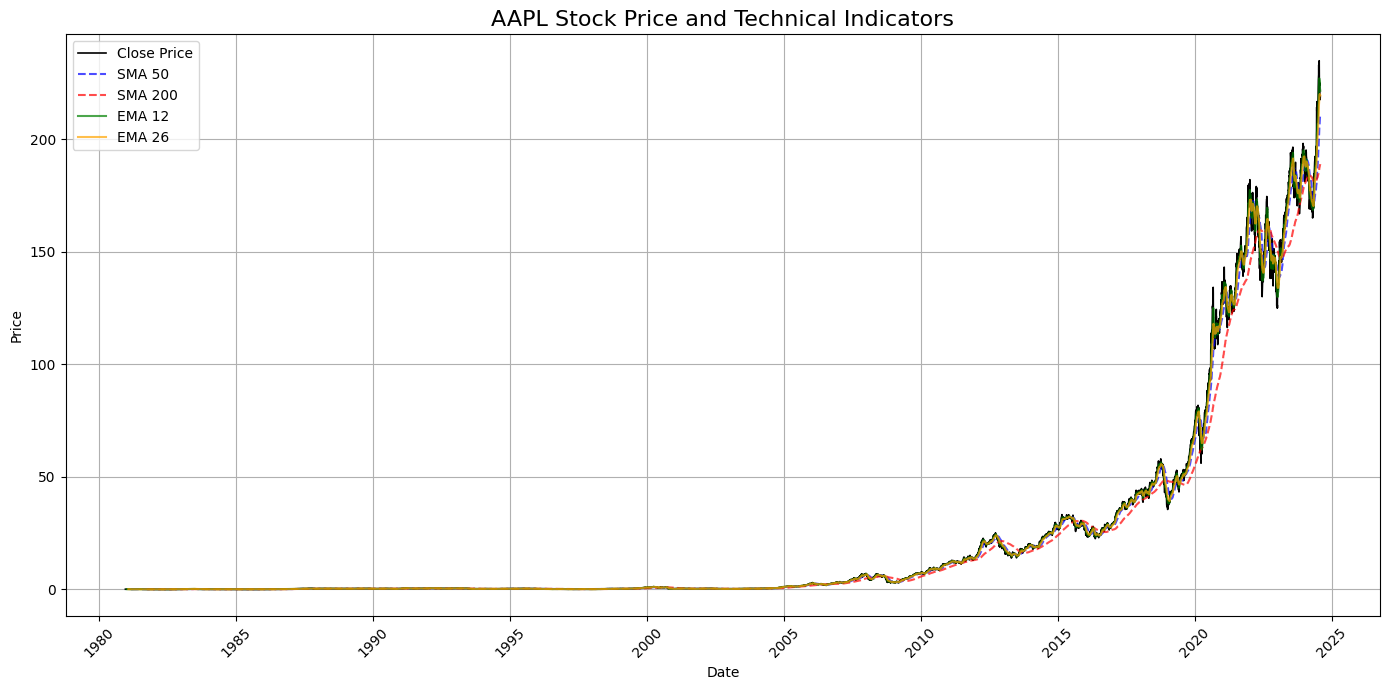

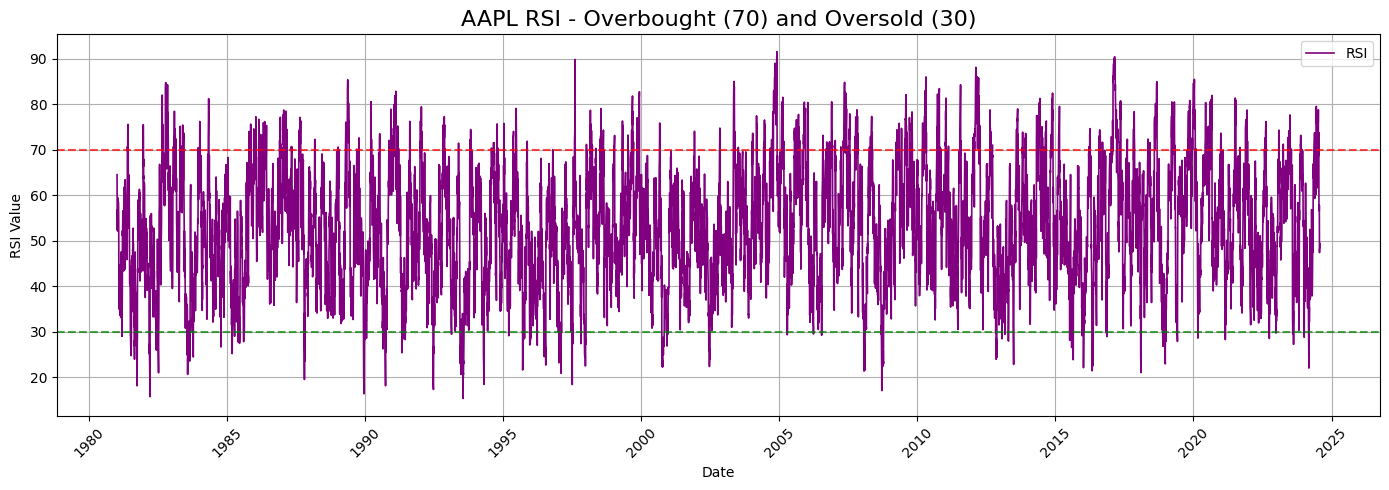

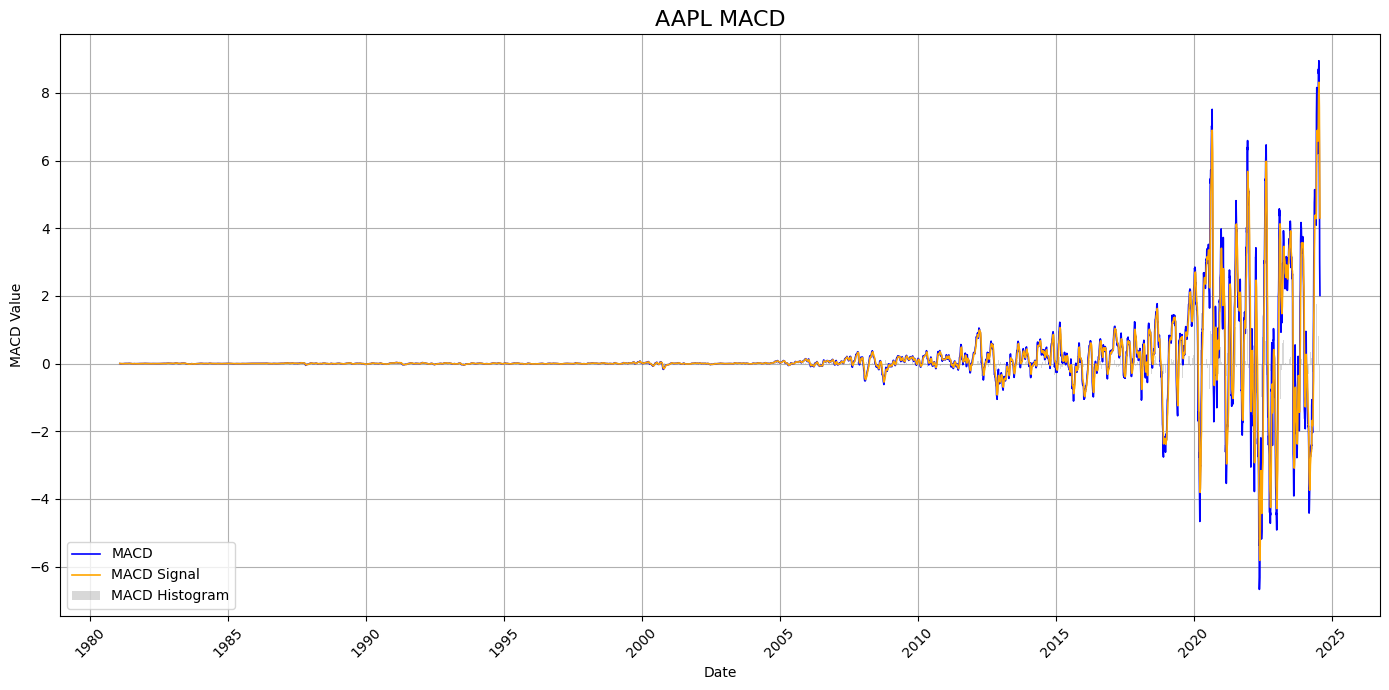

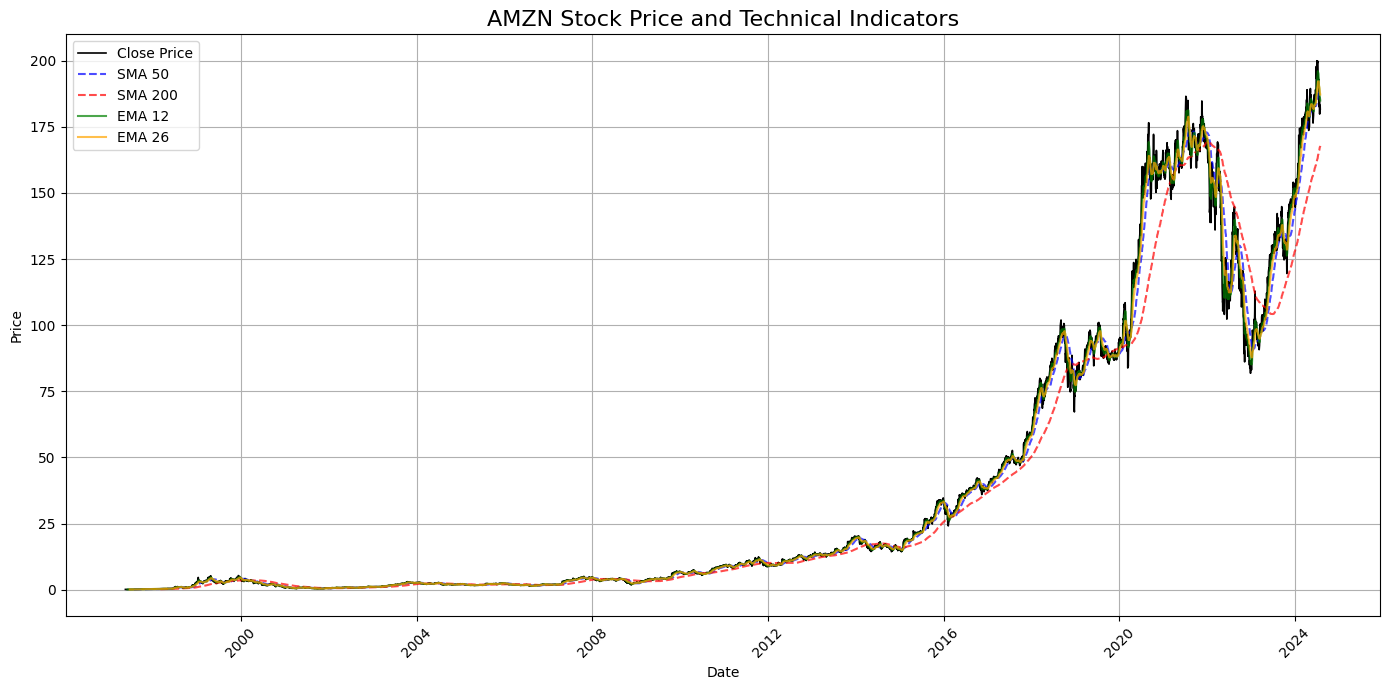

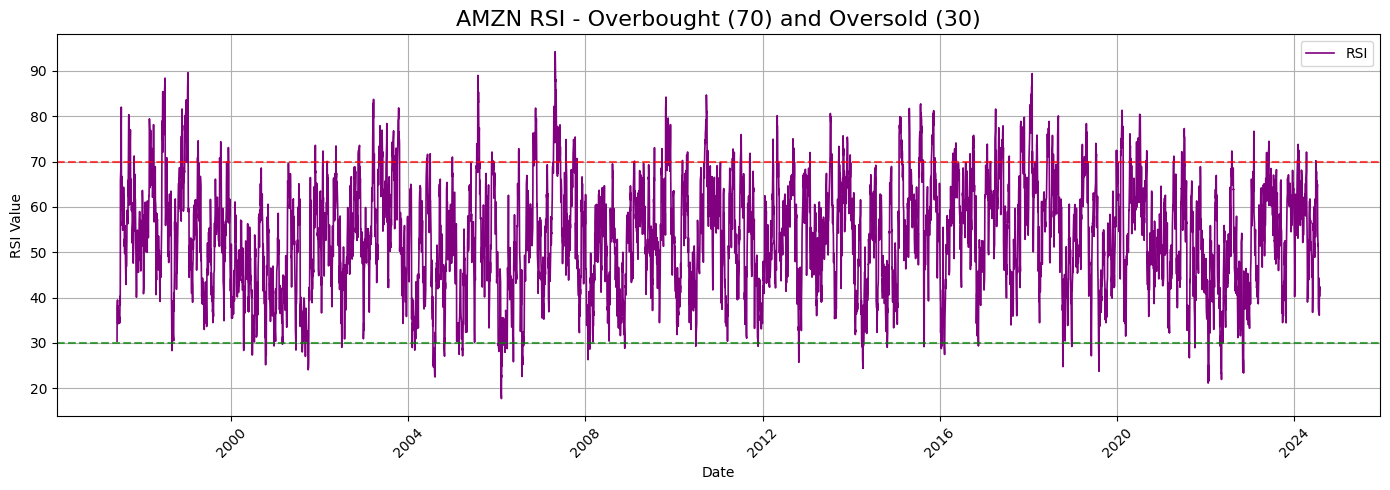

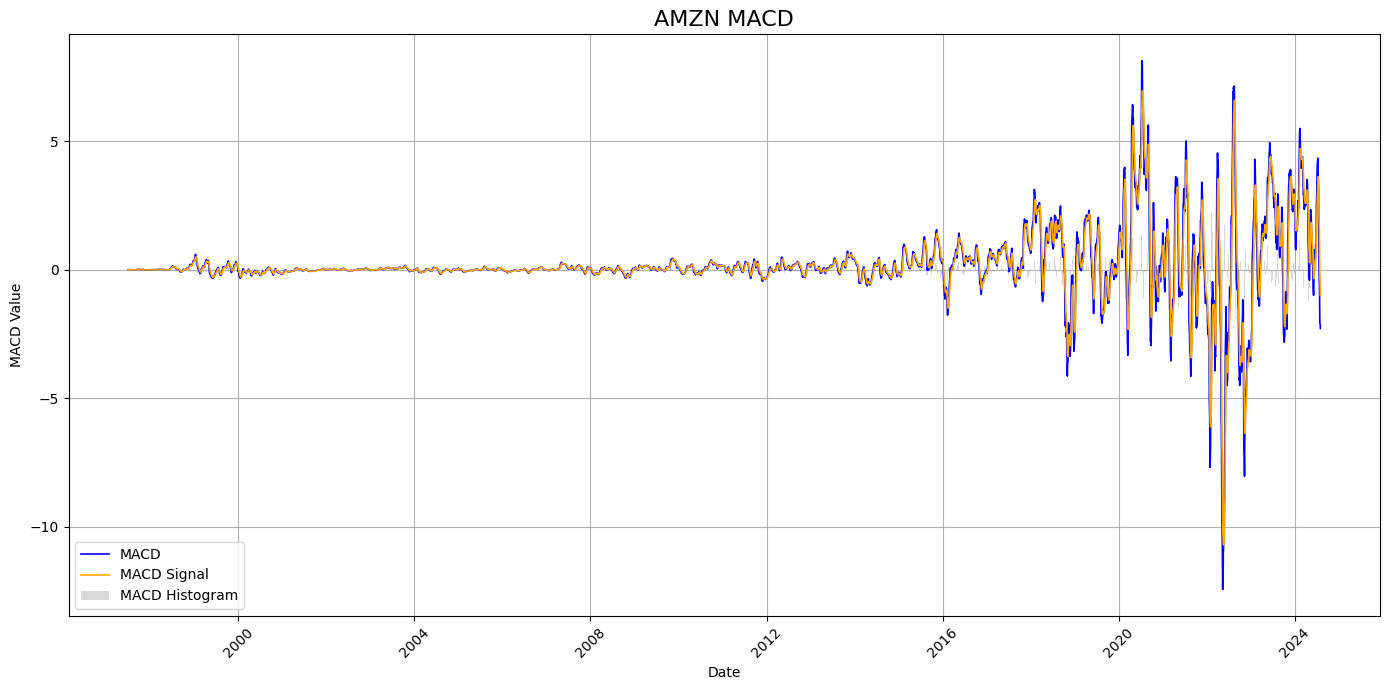

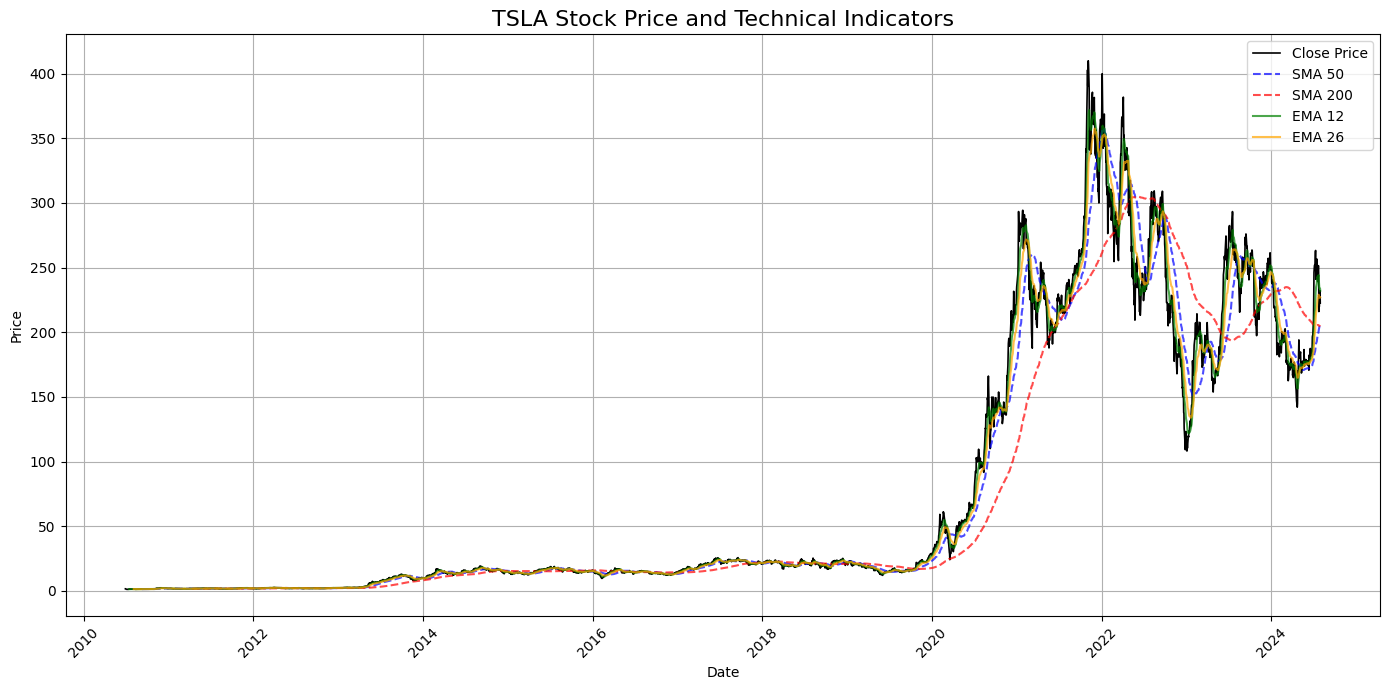

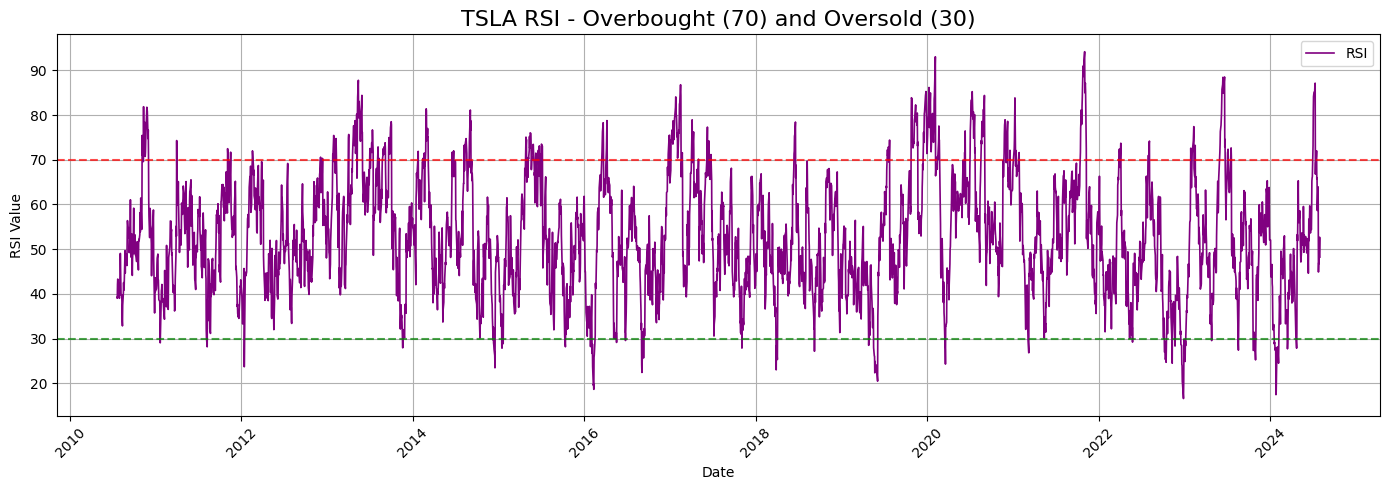

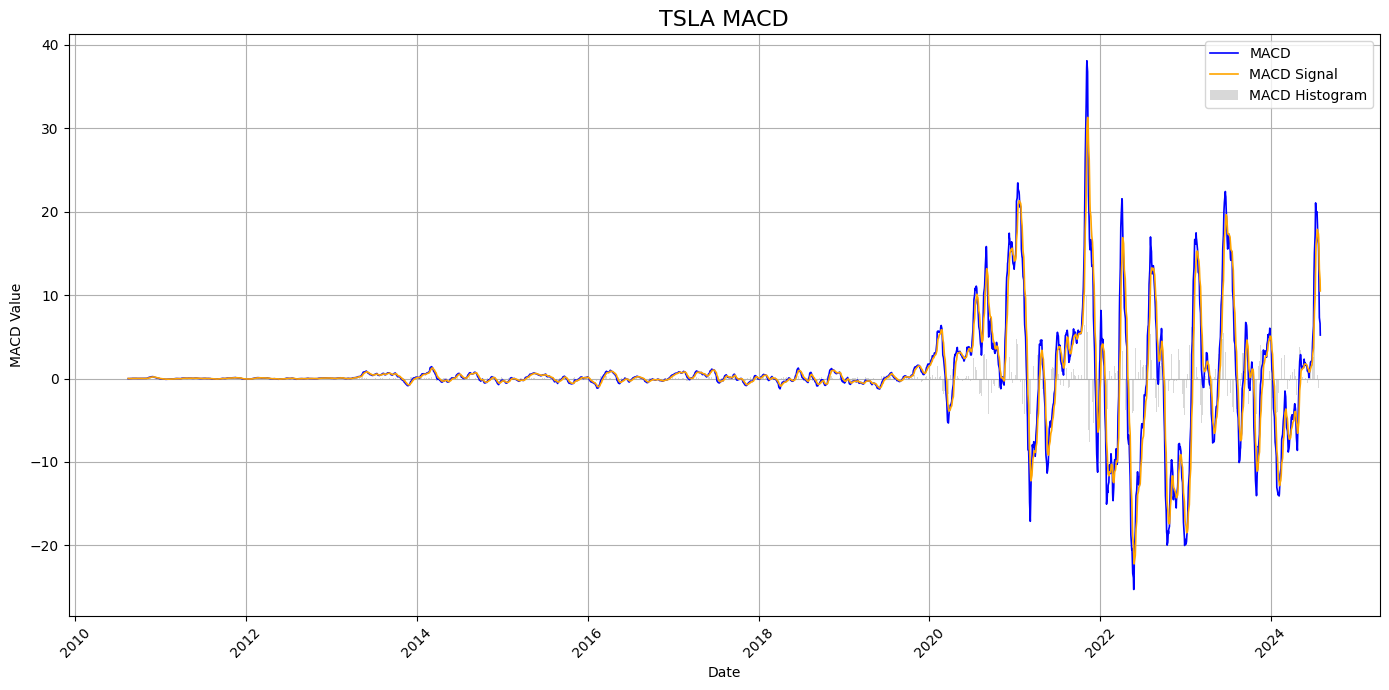

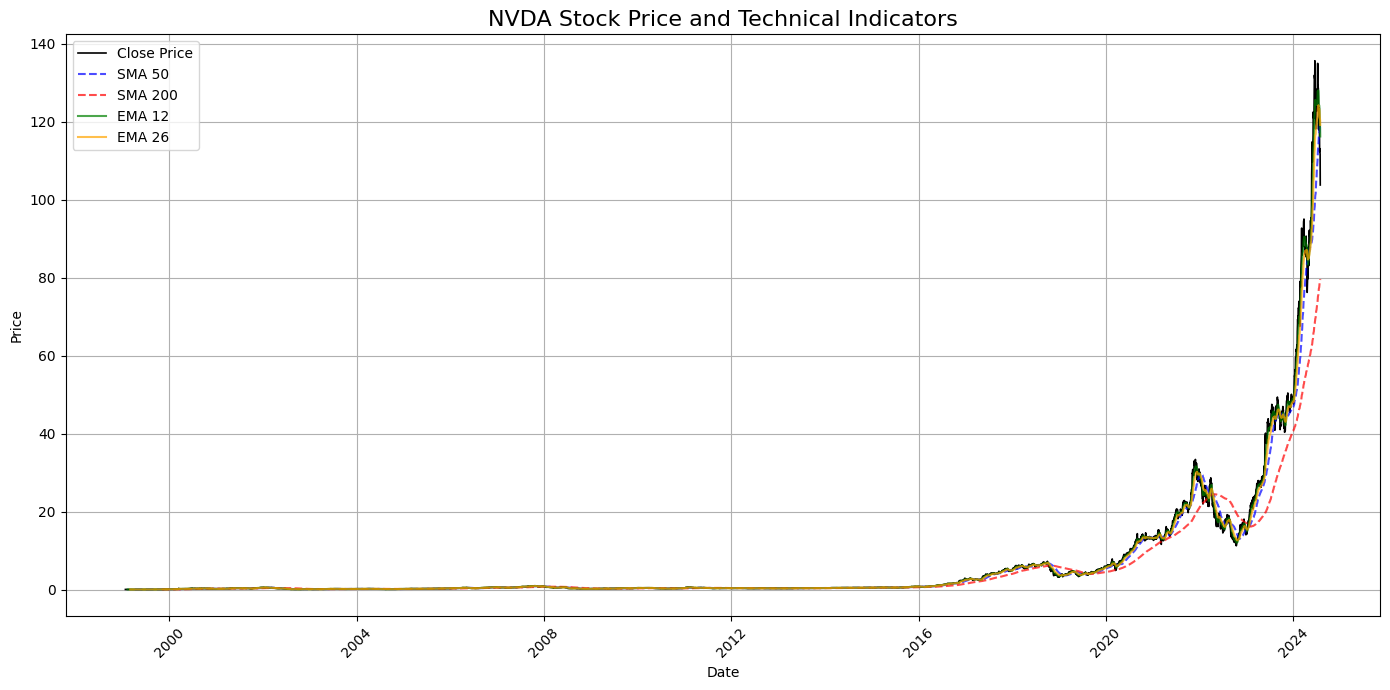

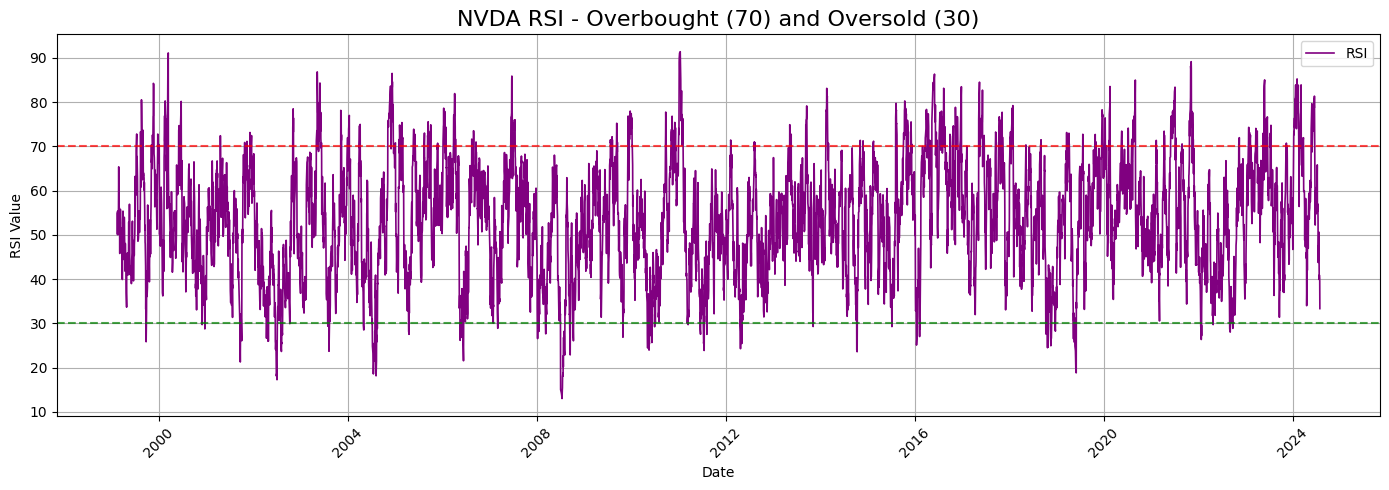

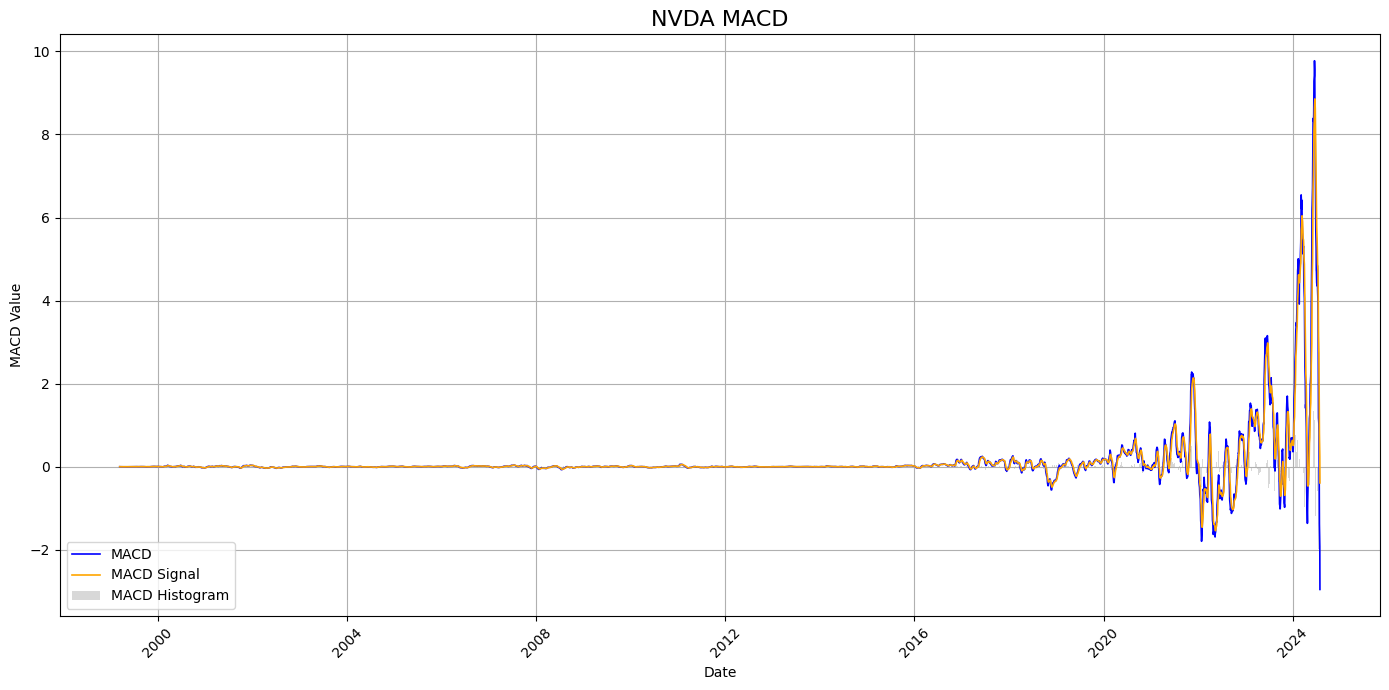

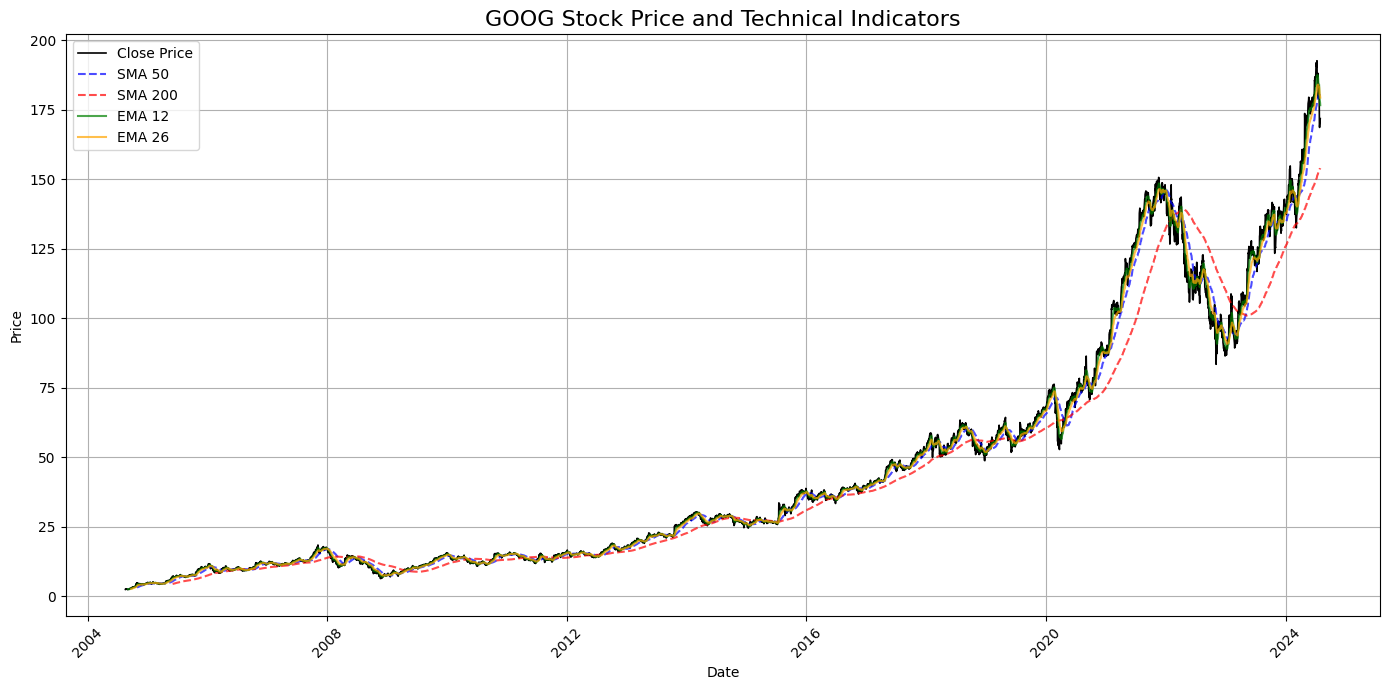

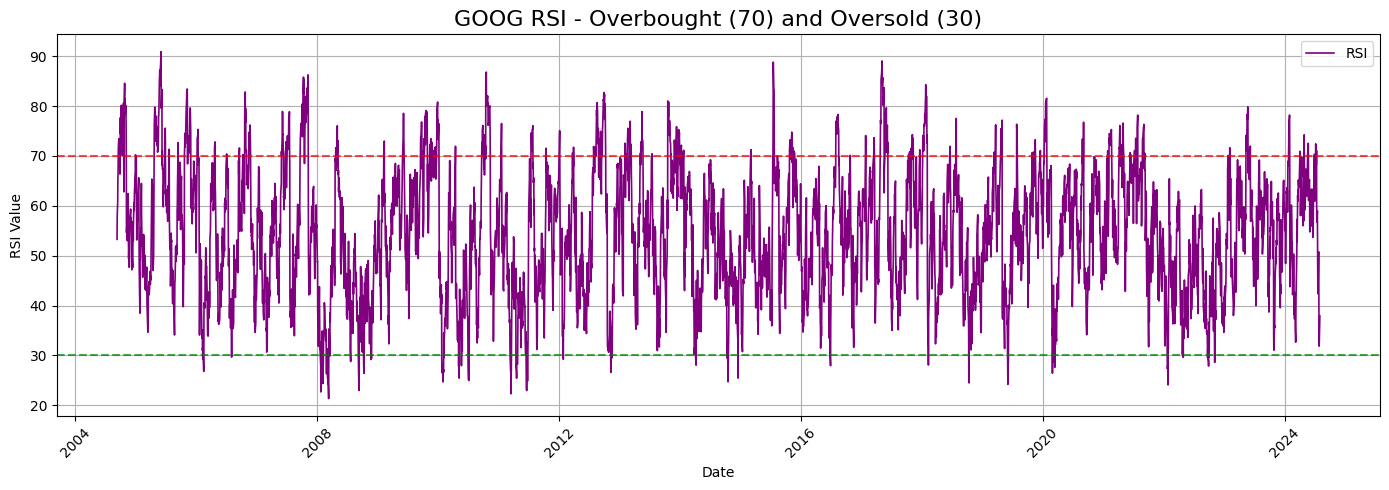

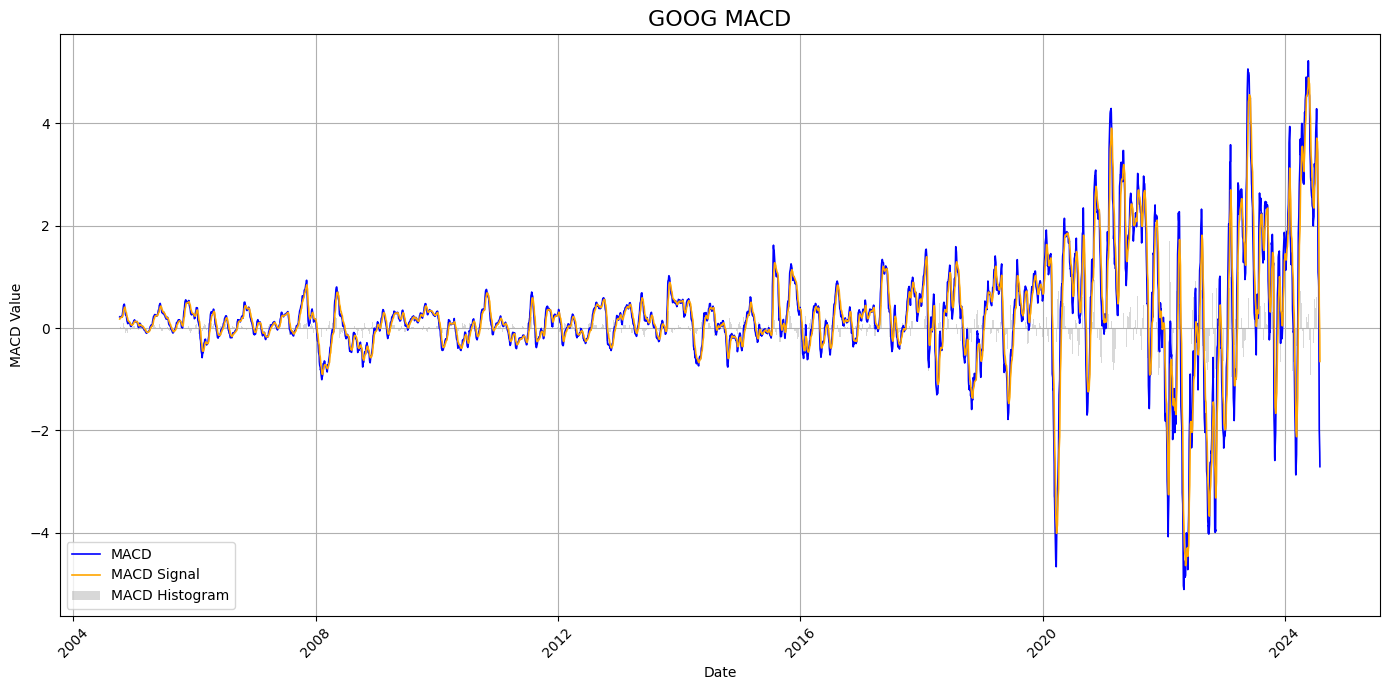

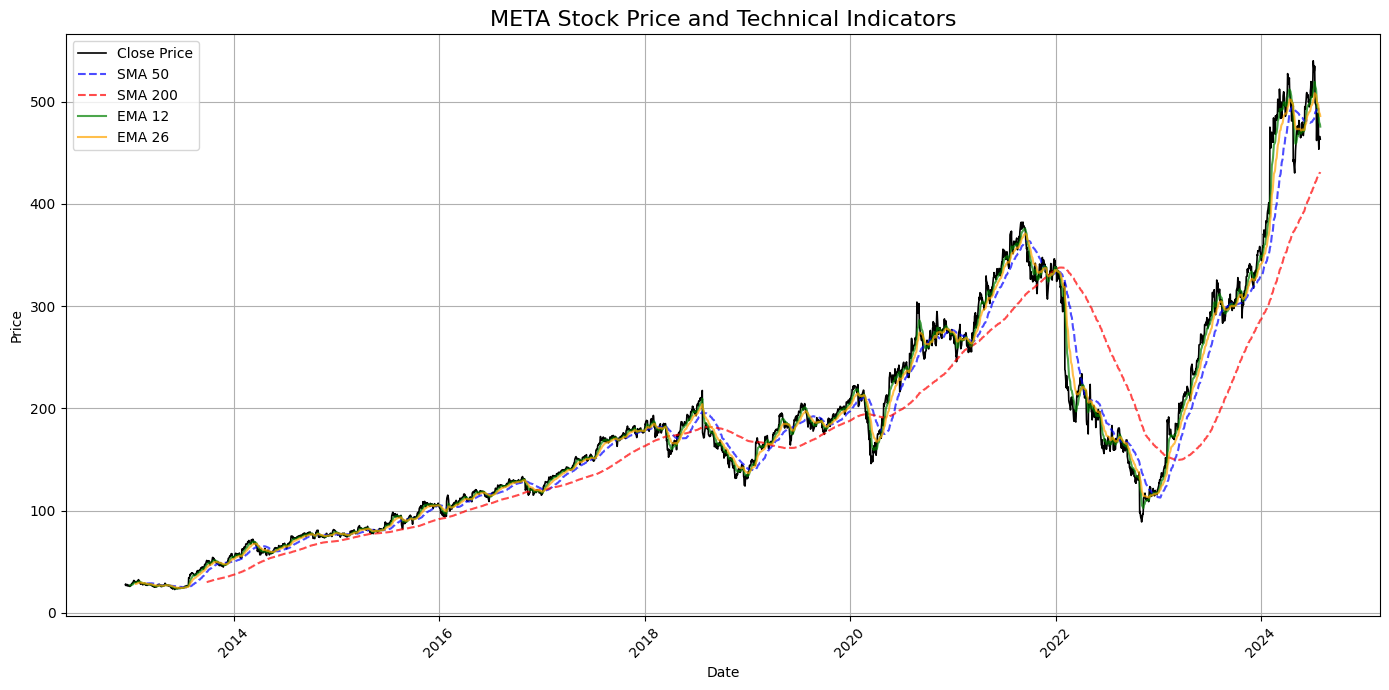

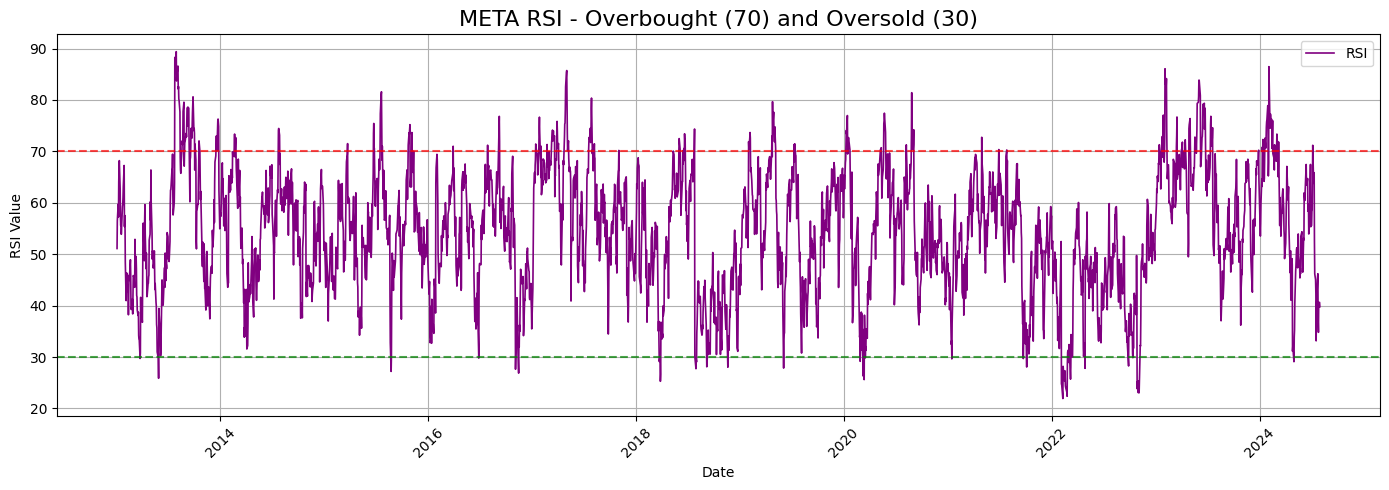

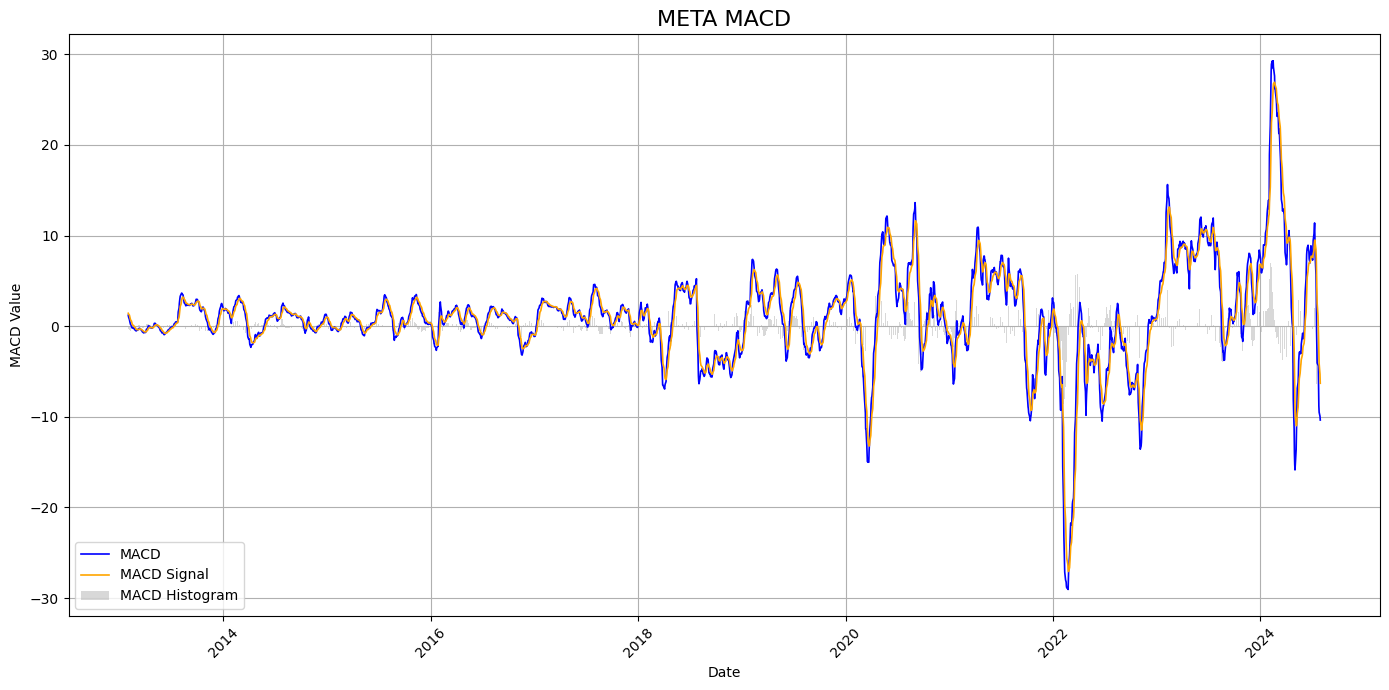

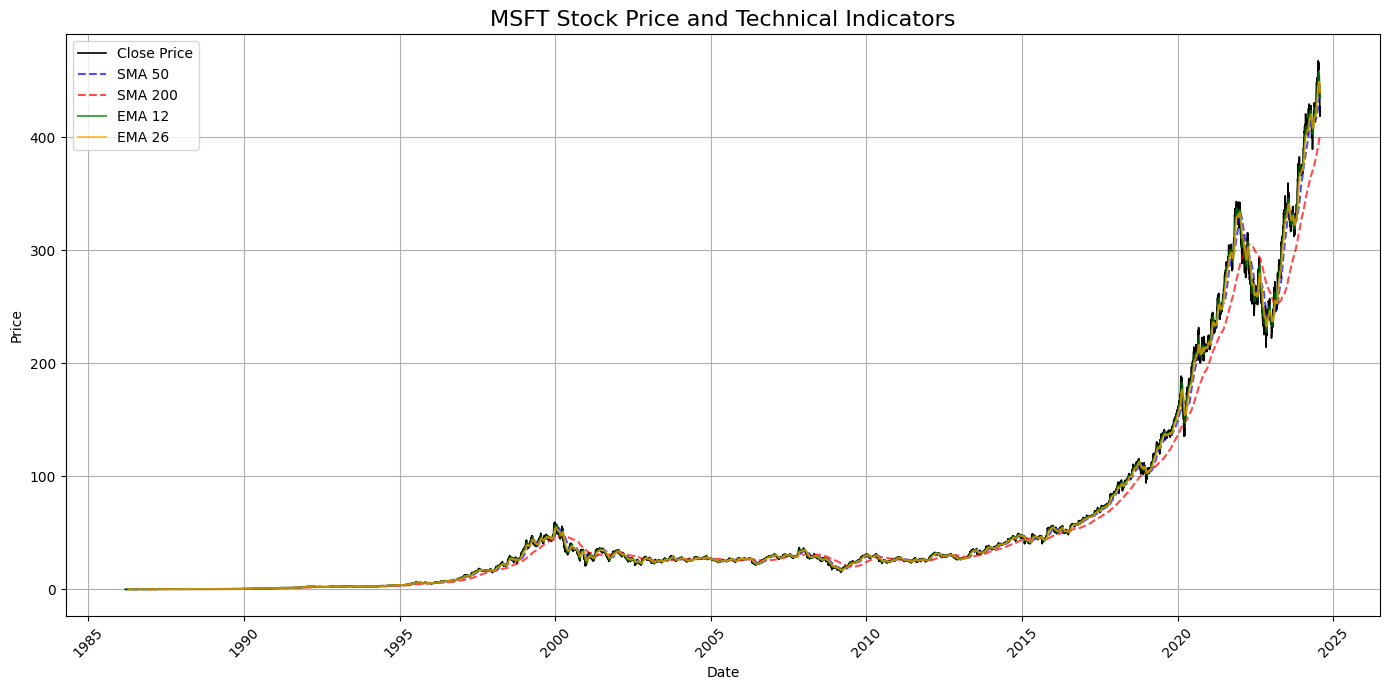

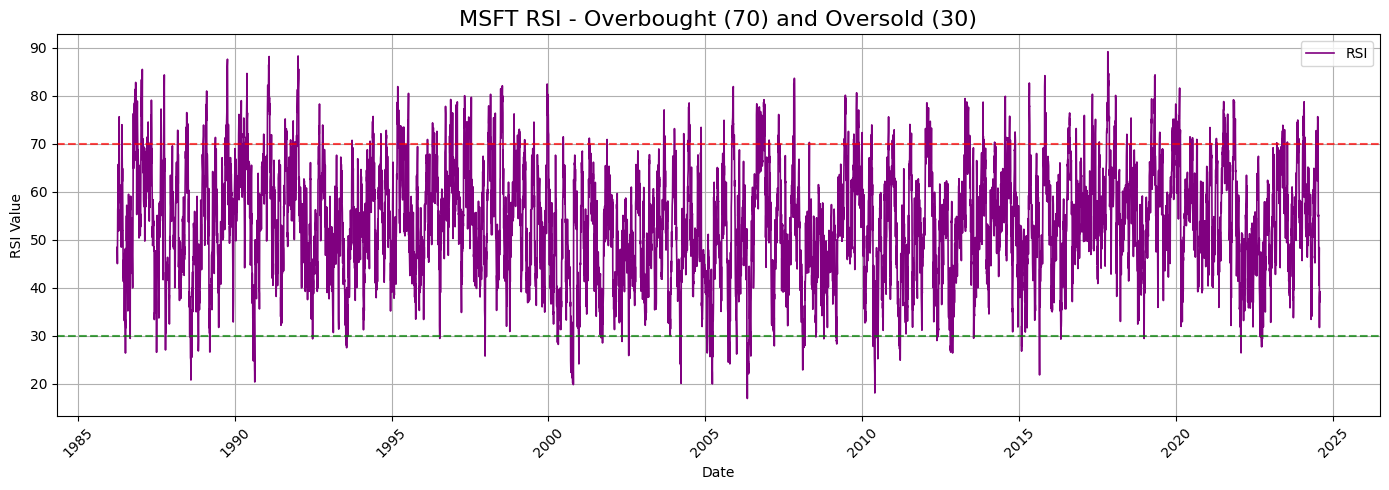

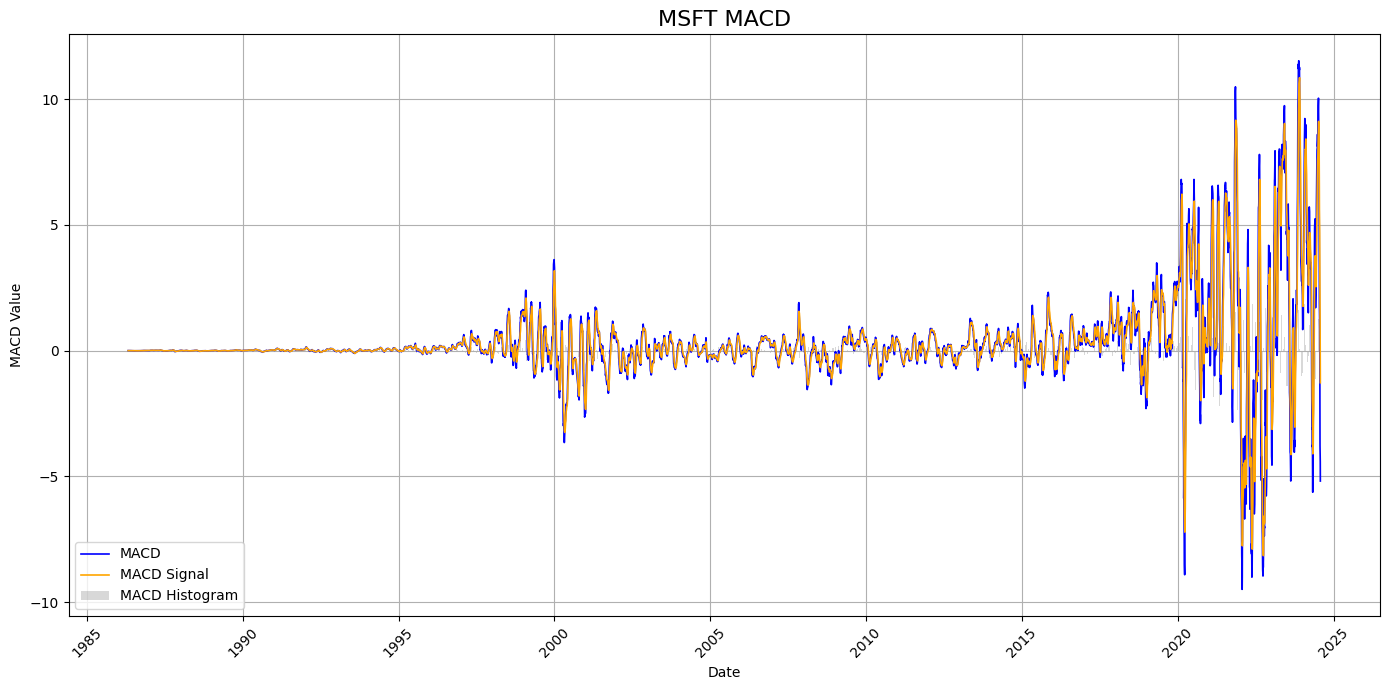

In [7]:
# Function to plot stock price and technical indicators for all stocks
def plot_technical_indicators_for_all_stocks(stock_data):
    """
    Plot the stock price along with key technical indicators (SMA, EMA, RSI, MACD) for all stocks.
    Args:
        stock_data (dict): Dictionary containing stock data for all tickers.
    """
    for ticker, df in stock_data.items():
        # Plot Stock Price and Moving Averages (SMA, EMA)
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1.2)
        plt.plot(df.index, df['SMA_50'], label='SMA 50', linestyle='--', color='blue', alpha=0.7)
        plt.plot(df.index, df['SMA_200'], label='SMA 200', linestyle='--', color='red', alpha=0.7)
        plt.plot(df.index, df['EMA_12'], label='EMA 12', color='green', alpha=0.7)
        plt.plot(df.index, df['EMA_26'], label='EMA 26', color='orange', alpha=0.7)

        plt.title(f'{ticker} Stock Price and Technical Indicators', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Plot RSI
        plt.figure(figsize=(14, 5))
        plt.plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=1.2)
        plt.axhline(70, linestyle='--', color='red', alpha=0.7)
        plt.axhline(30, linestyle='--', color='green', alpha=0.7)
        plt.title(f'{ticker} RSI - Overbought (70) and Oversold (30)', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('RSI Value')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Plot MACD
        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['MACD'], label='MACD', color='blue', linewidth=1.2)
        plt.plot(df.index, df['MACD_signal'], label='MACD Signal', color='orange', linewidth=1.2)
        plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)

        plt.title(f'{ticker} MACD', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('MACD Value')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function to plot for all stocks in the dataset
plot_technical_indicators_for_all_stocks(stock_data)


In [30]:
import pandas as pd
import numpy as np

# Function to calculate financial metrics for all stocks without optimization
def calculate_financial_metrics_for_all_stocks(stock_data):
    """
    Calculate daily returns, volatility, and cumulative returns for all stocks.
    Args:
        stock_data (dict): Dictionary containing stock data for all tickers.
    """
    performance_data = {}

    for ticker, df in stock_data.items():
        # Calculate daily returns (percentage change)
        df['Returns'] = df['Close'].pct_change() * 100  # Returns in percentage
        # Drop any rows with NaN or infinite values in the Returns column
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Returns'])

        # Calculate expected return (mean of daily returns)
        expected_return = df['Returns'].mean() * 252  # Annualize by multiplying by 252 trading days

        # Calculate volatility (standard deviation of daily returns)
        volatility = df['Returns'].std() * np.sqrt(252)  # Annualized volatility

        # Calculate cumulative returns
        df['Cumulative Returns'] = (1 + df['Returns'] / 100).cumprod() - 1

        # Store the performance metrics for each stock
        performance_data[ticker] = {
            'Expected Annual Return': expected_return,
            'Annualized Volatility': volatility,
            'Cumulative Return': df['Cumulative Returns'].iloc[-1]
        }

    return performance_data

# Example: Apply financial metrics to all stocks
performance_data = calculate_financial_metrics_for_all_stocks(stock_data)

# Display performance metrics for all stocks
for ticker, performance in performance_data.items():
    print(f"\nPerformance for {ticker}:")
    print(f"Expected Annual Return: {performance['Expected Annual Return']:.2f}%")
    print(f"Annualized Volatility: {performance['Annualized Volatility']:.2f}%")
    print(f"Cumulative Return: {performance['Cumulative Return']:.2f}%")



Performance for AAPL:
Expected Annual Return: 27.03%
Annualized Volatility: 44.28%
Cumulative Return: 1703.74%

Performance for AMZN:
Expected Annual Return: 43.24%
Annualized Volatility: 56.24%
Cumulative Return: 1854.76%

Performance for TSLA:
Expected Annual Return: 51.28%
Annualized Volatility: 56.94%
Cumulative Return: 138.78%

Performance for NVDA:
Expected Annual Return: 48.70%
Annualized Volatility: 60.11%
Cumulative Return: 2528.01%

Performance for GOOG:
Expected Annual Return: 25.92%
Annualized Volatility: 30.67%
Cumulative Return: 67.77%

Performance for META:
Expected Annual Return: 31.74%
Annualized Volatility: 38.54%
Cumulative Return: 15.79%

Performance for MSFT:
Expected Annual Return: 27.48%
Annualized Volatility: 33.54%
Cumulative Return: 4349.04%


In [34]:
import talib

def calculate_technical_indicators(df):
    """
    Calculate technical indicators like RSI, MACD, SMA, EMA, and Cumulative Return.
    """
    # Calculate RSI
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

    # Calculate MACD
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    # Calculate SMA and EMA
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['EMA_12'] = talib.EMA(df['Close'], timeperiod=12)

    # Calculate Cumulative Returns
    df['Cumulative Returns'] = (1 + df['Returns'] / 100).cumprod() - 1

    return df

# Apply technical indicators and cumulative returns to each stock
for ticker, df in stock_data.items():
    stock_data[ticker] = calculate_technical_indicators(df)

# Example: Show the technical indicators for AAPL
print(stock_data['AAPL'].head())


                Open      High       Low     Close     Volume  SMA_50  \
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600     NaN   
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800     NaN   
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000     NaN   
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600     NaN   
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600     NaN   

            SMA_200  EMA_12  EMA_26  RSI  MACD  MACD_signal  MACD_hist  \
Date                                                                     
1980-12-12      NaN     NaN     NaN  NaN   NaN          NaN        NaN   
1980-12-15      NaN     NaN     NaN  NaN   NaN          NaN        NaN   
1980-12-16      NaN     NaN     NaN  NaN   NaN          NaN        NaN   
1980-12-17      NaN     NaN     NaN  NaN   NaN          NaN        NaN   
1980-12-18      NaN     NaN     NaN  NaN   N

In [35]:
# Create a summary DataFrame to store all the metrics for reporting
report_data = []

for ticker, df in stock_data.items():
    performance = {
        'Ticker': ticker,
        'RSI Mean': df['RSI'].mean(),
        'MACD Mean': df['MACD'].mean(),
        'SMA_50 Mean': df['SMA_50'].mean(),
        'EMA_12 Mean': df['EMA_12'].mean(),
        'Cumulative Return': df['Cumulative Returns'].iloc[-1]
    }
    report_data.append(performance)

# Convert to DataFrame
report_df = pd.DataFrame(report_data)

# Display the report
print(report_df)

# Optionally, save to CSV
report_df.to_csv('stock_performance_report.csv', index=False)


  Ticker   RSI Mean  MACD Mean  SMA_50 Mean  EMA_12 Mean  Cumulative Return
0   AAPL  53.119636   0.139020    21.923676    22.224146        1703.740356
1   AMZN  53.522118   0.194132    36.940910    37.262318        1854.755492
2   TSLA  52.886059   0.441561    74.984347    75.358936         138.778119
3   NVDA  53.598449   0.133035     5.786374     6.118641        2528.013073
4   GOOG  54.428017   0.250908    44.814758    45.177086          67.767846
5   META  54.377650   1.126232   178.268660   179.379317          15.794416
6   MSFT  53.759398   0.322168    57.587227    58.236798        4349.044351


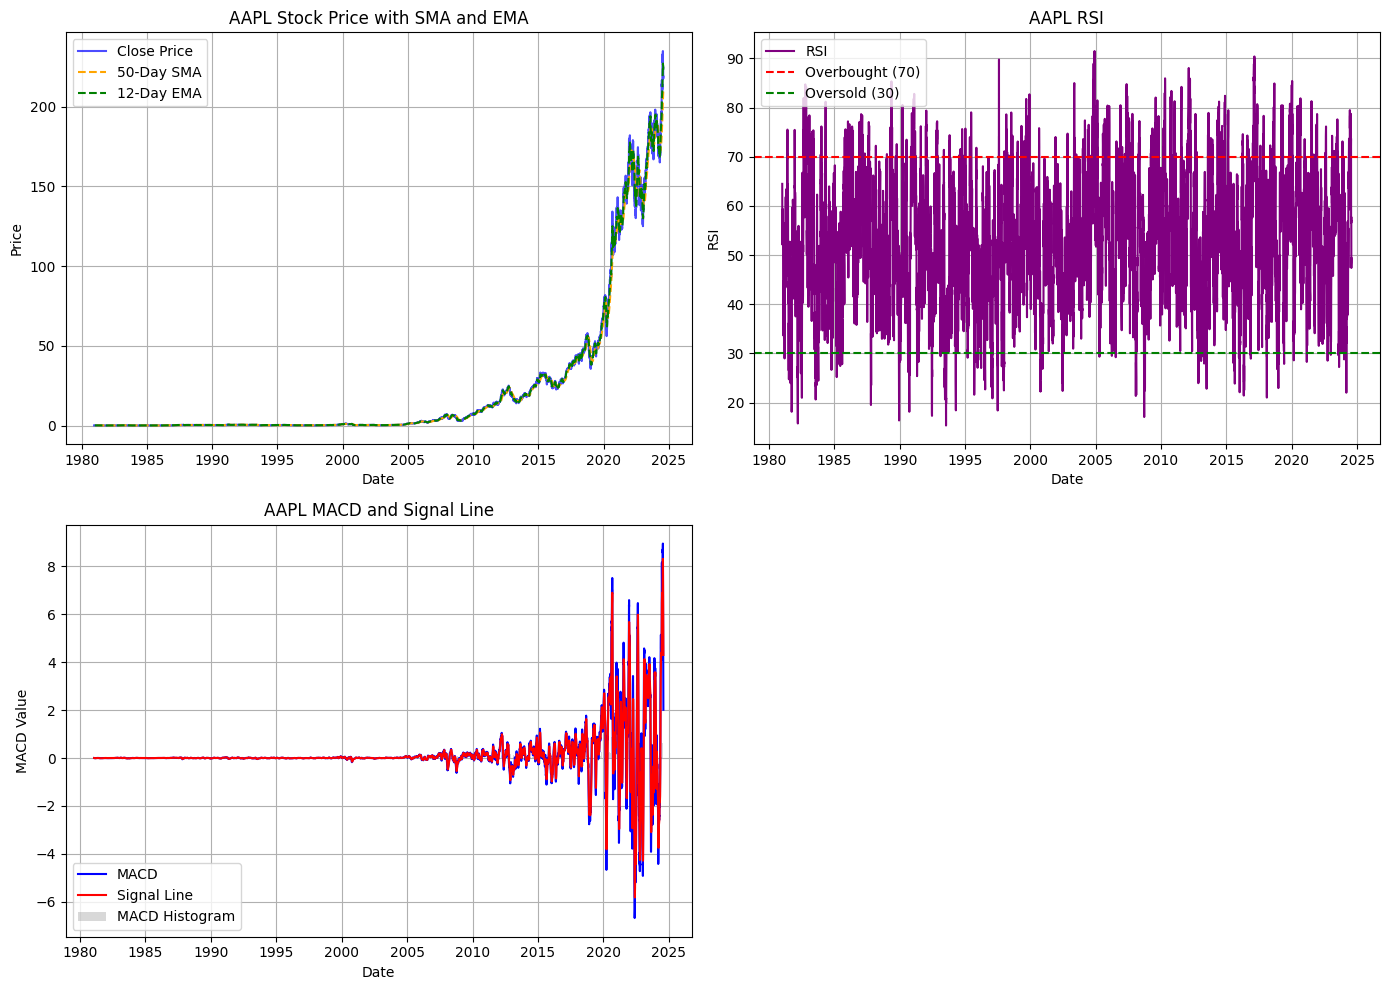

In [36]:
import matplotlib.pyplot as plt

def plot_technical_indicators(df, ticker):
    """
    Plot stock price and technical indicators (RSI, MACD, SMA, EMA).
    """
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))

    # Plot Stock Price and Indicators (SMA and EMA)
    plt.subplot(2, 2, 1)
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.7)
    plt.plot(df['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(df['EMA_12'], label='12-Day EMA', color='green', linestyle='--')
    plt.title(f'{ticker} Stock Price with SMA and EMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Plot RSI
    plt.subplot(2, 2, 2)
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{ticker} RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)

    # Plot MACD with Signal Line and Histogram
    plt.subplot(2, 2, 3)
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['MACD_signal'], label='Signal Line', color='red')
    plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', alpha=0.3, color='gray')
    plt.title(f'{ticker} MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example: Plot technical indicators for AAPL (you can replace 'AAPL' with any other ticker)
plot_technical_indicators(stock_data['AAPL'], 'AAPL')
